<div align="right">
  ### Alejandro Garcia
</div>
<h1><center>Predicting profitability from movies dataset</center></h1> 

## Table of Content
### 1.) Introduction
### 2.) Dataset
### 3.) Exploratory Data Analysis
### 4.) Data Wrangling
### 5.) Machine Learning
### 6.) Conclusion

###  <center>Introduction</center>
The main objective of this project is to accuratly predict the profitability of a movie based on numerous parameters shown below. I will start with EDA to get familiar with the data and start to think about crafting a possible solution to this problem. I will then proceed to wrangling and cleaning the data for our model to work properly. Finally, I will configure several machine learning models and decide which one gives us the best results.

Note: If you have any questions about this project please feel free to shoot over an email: a19garcia95@gmail.com.


###  <center>Dataset</center>
The data comes from www.IMBd.com which is a website used to review movies. Here is a preview of what the data looks like.


In [3]:
import pandas as pd
df = pd.read_csv("box_office_predictions.csv") 
df.head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853


###  <center>Exploratory Data Analysis</center>

In [4]:
df.describe()

,budget,gross,runtime,score,votes
count,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6.000000e+03
mean,2.469918e+07,3.341635e+07,106.587000,6.386383,7.188537e+04
std,3.721710e+07,5.735205e+07,18.026885,0.994921,1.308033e+05
min,0.000000e+00,4.410000e+02,50.000000,1.500000,2.700000e+01
25%,0.000000e+00,1.527796e+06,95.000000,5.800000,7.791750e+03
50%,1.100000e+07,1.229897e+07,102.000000,6.500000,2.660150e+04
75%,3.262500e+07,4.007256e+07,115.000000,7.100000,7.677475e+04
max,3.000000e+08,7.605076e+08,366.000000,9.300000,1.868308e+06


Interesting enough, when we run the describe() function through the dataset, we are able to observe that the upper quartile is where most of the data is concentrated. An example of this is the cell below that shows that the top 6 countries account for most of the countries where movies are made.

In [5]:
df['country'].value_counts()

USA                               4281
UK                                 615
France                             249
Canada                             126
Germany                            119
Australia                           71
Japan                               59
Spain                               50
Italy                               47
Ireland                             40
Hong Kong                           38
India                               36
Denmark                             31
China                               23
South Korea                         18
New Zealand                         17
Sweden                              17
Belgium                             15
Mexico                              13
Netherlands                         12
Russia                              10
Iran                                10
Argentina                           10
Czech Republic                       8
Norway                               8
Taiwan                   

In [6]:
df[['score', 'votes', 'budget', 'gross', 'runtime']].corr()

,score,votes,budget,gross,runtime
score,1.000000,0.393703,0.039169,0.161371,0.393470
votes,0.393703,1.000000,0.504808,0.664010,0.308524
budget,0.039169,0.504808,1.000000,0.716826,0.264963
gross,0.161371,0.664010,0.716826,1.000000,0.224996
runtime,0.393470,0.308524,0.264963,0.224996,1.000000


We can state that if the correlation between 2 variables is over 50%, it is highly correleated and therefore important for our machine learning model later on. In this case, budget-votes, gross-votes, budget-gross, are highly correlated. Later on I will run the same function on our cleaned dataset and observe wether the correleations remain the same.

Another graph that I find very helpful when trying to understand the data given to use, is the histrogram. In this case we can observe how our numerical variables behave. (Histogram shown below)

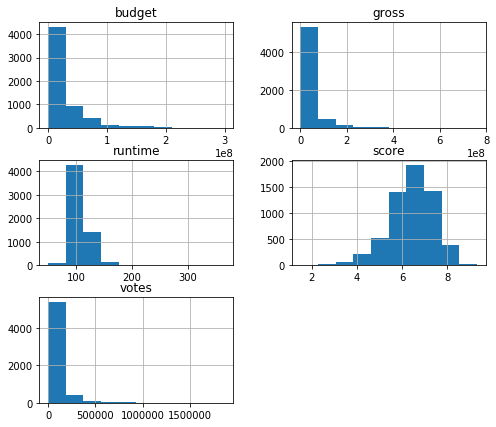

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(figsize=(8,7))
plt.show()

### NOTE: The next couple of bar graphs show how diferent categorical variables relate to our most important variable so far, which is 'Gross'. This is the revenue generated. I state that 'Gross' is our most important variable because the more revenue generated, the better the movie. This is generally how it goes. Of course, this is not always the case.

Text(0,0.5,'Gross')

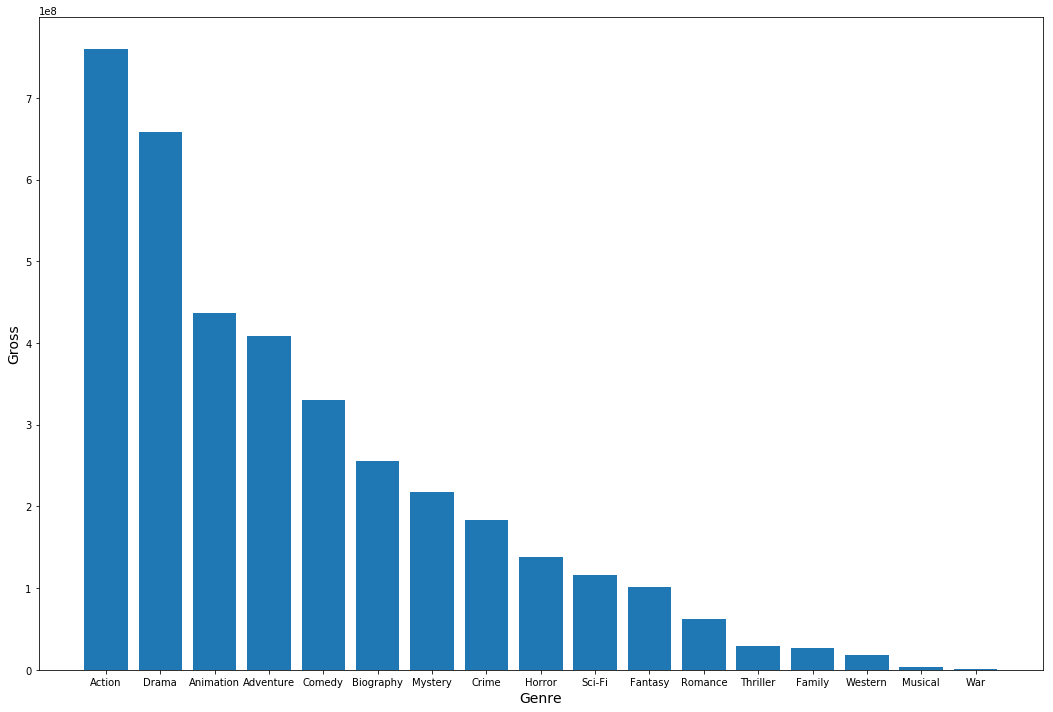

In [8]:
x_axis = df['genre']
y_axis = df['gross']
width = 18
height = 12
plt.figure(figsize=(width, height))
plt.bar(x_axis, y_axis)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Gross', fontsize=14)

In [9]:
print(df['genre'].head(10))

0       Action
1        Drama
2       Action
3       Action
4       Action
5       Action
6       Action
7       Action
8       Action
9    Animation
Name: genre, dtype: object


In [10]:
xx = df['studio'].where(df['gross'] > 200000000)
type(xx)

pandas.core.series.Series

Text(0,0.5,'Gross')

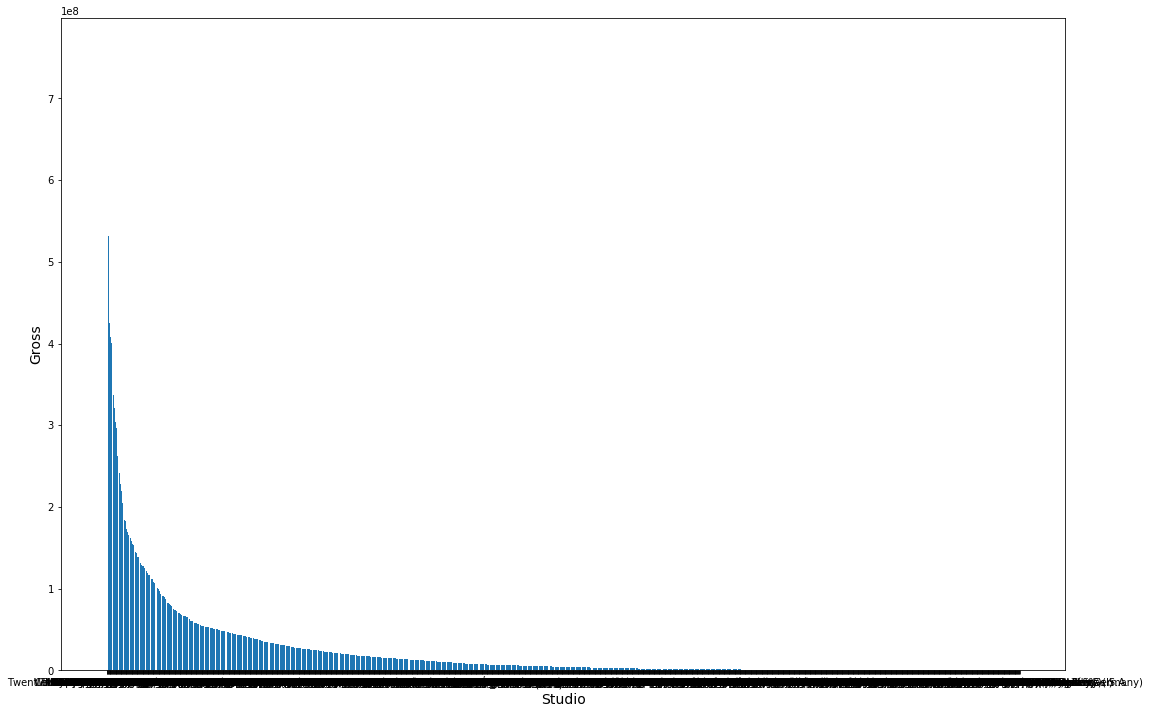

In [11]:
x_axis = df['studio']
y_axis = df['gross']
width = 18
height = 12
plt.figure(figsize=(width, height))
plt.bar(x_axis, y_axis)
plt.xlabel('Studio', fontsize=14)
plt.ylabel('Gross', fontsize=14)

Text(0,0.5,'Gross')

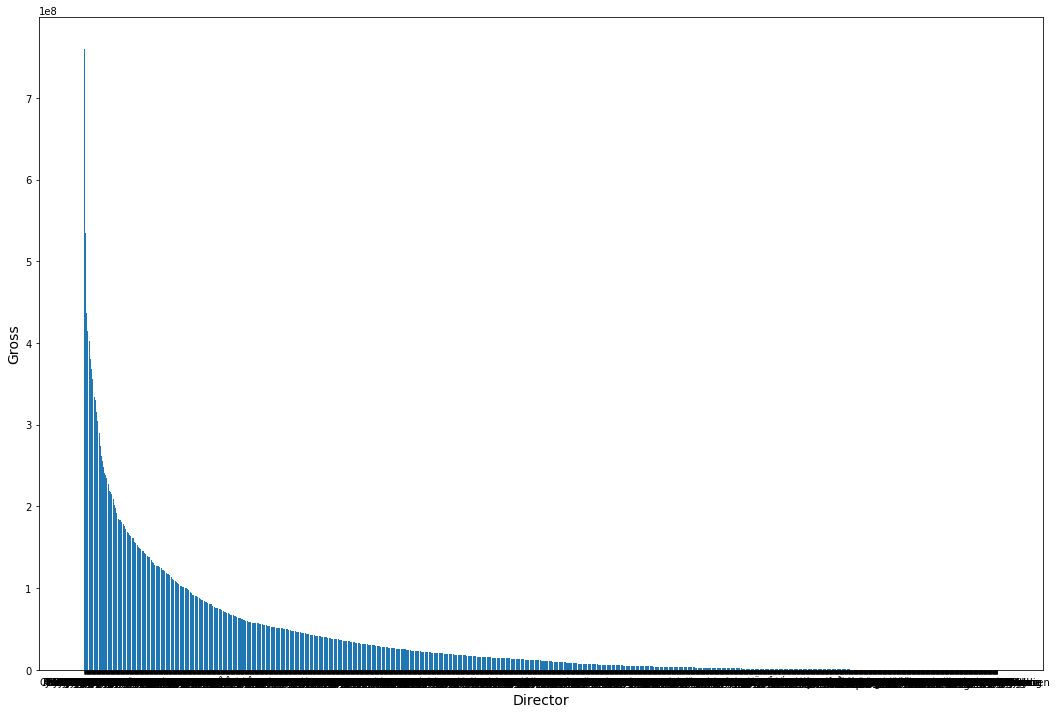

In [12]:
x_axis = df['director']
y_axis = df['gross']
width = 18
height = 12
plt.figure(figsize=(width, height))
plt.bar(x_axis, y_axis)
plt.xlabel('Director', fontsize=14)
plt.ylabel('Gross', fontsize=14)

Text(0,0.5,'Gross')

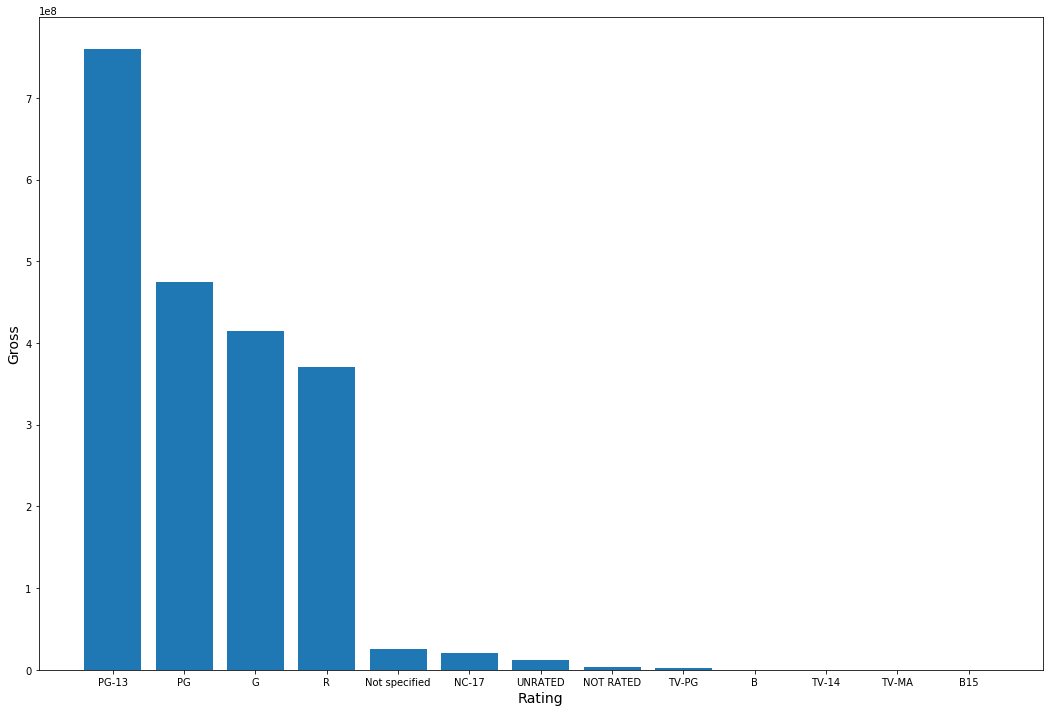

In [13]:
x_axis = df['rating']
y_axis = df['gross']
width = 18
height = 12
plt.figure(figsize=(width, height))
plt.bar(x_axis, y_axis)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Gross', fontsize=14)

### <center>Data Wrangling</center>

In [15]:
df[df.budget == 0].head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes
56,0.0,UK,David Yates,Adventure,295983305.0,Harry Potter and the Deathly Hallows: Part 1 (...,PG-13,146,7.7,Daniel Radcliffe,Warner Bros.,370003
207,0.0,USA,Walt Becker,Action,168273550.0,Wild Hogs (2007),PG-13,100,5.9,Tim Allen,Touchstone Pictures,104657
431,0.0,USA,John G. Avildsen,Action,115103979.0,The Karate Kid Part II (1986),PG,113,5.9,Pat Morita,Columbia Pictures Corporation,58596
553,0.0,USA,Nora Ephron,Comedy,95318203.0,Michael (1996),PG,105,5.7,John Travolta,Turner Pictures (I),36553
592,0.0,USA,Tyler Perry,Comedy,90485233.0,Madea Goes to Jail (2009),PG-13,103,4.3,Tyler Perry,"Tyler Perry Company, The",10095


In [ ]:
df = df.loc[df.budget > 0,:] #removing missing values

In [16]:
#Profit would be a useful variable since not profitability is what determines success, not revenue
df['profit'] = df.gross - df.budget

In [17]:
df.describe(include=['object']) 

,country,director,genre,name,rating,star,studio
count,6000,6000,6000,6000,6000,6000,6000
unique,52,2549,17,6000,13,2317,1996
top,USA,Woody Allen,Comedy,Gnomeo & Juliet (2011),R,Nicolas Cage,Universal Pictures
freq,4281,29,1818,1,3009,38,269


In [18]:
#lets condense the dataset, this will give us a sense of what matters the most

In [19]:
studio_counts = df.studio.value_counts()

one_timers = studio_counts[studio_counts <= 1].index
three_timers = studio_counts[(studio_counts > 1) & (studio_counts <= 3)].index
five_timers = studio_counts[(studio_counts > 3) & (studio_counts <= 5)].index
ten_timers = studio_counts[(studio_counts > 5) & (studio_counts <= 10)].index

df['studio'].replace(one_timers, 'One Timer', inplace=True)
df['studio'].replace(three_timers, 'Three Timer', inplace=True)
df['studio'].replace(five_timers, 'Five Timer', inplace=True)
df['studio'].replace(ten_timers, 'Ten Timer', inplace=True)

In [20]:
star_counts = df.star.value_counts()

one_timers = star_counts[star_counts <= 1].index
three_timers = star_counts[(star_counts > 1) & (star_counts <= 3)].index
five_timers = star_counts[(star_counts > 3) & (star_counts <= 5)].index
ten_timers = star_counts[(star_counts > 5) & (star_counts <= 10)].index

df['star'].replace(one_timers, 'One Timer', inplace=True)
df['star'].replace(three_timers, 'Three Timer', inplace=True)
df['star'].replace(five_timers, 'Five Timer', inplace=True)
df['star'].replace(ten_timers, 'Ten Timer', inplace=True)

In [21]:
director_counts = df.director.value_counts()

one_timers = director_counts[director_counts <= 1].index
three_timers = director_counts[(director_counts > 1) & (director_counts <= 3)].index
five_timers = director_counts[(director_counts > 3) & (director_counts <= 5)].index
ten_timers = director_counts[(director_counts > 5) & (director_counts <= 10)].index

df['director'].replace(one_timers, 'One Timer', inplace=True)
df['director'].replace(three_timers, 'Three Timer', inplace=True)
df['director'].replace(five_timers, 'Five Timer', inplace=True)
df['director'].replace(ten_timers, 'Ten Timer', inplace=True)

In [22]:
country_counts = df.country.value_counts()

other_countries = country_counts[country_counts < 50].index
df['country'].replace(other_countries, 'Other', inplace=True)

df.country.value_counts()

USA          4281
UK            615
Other         430
France        249
Canada        126
Germany       119
Australia      71
Japan          59
Spain          50
Name: country, dtype: int64

In [23]:
genre_counts = df.genre.value_counts()

other_genres = genre_counts[genre_counts < 50].index
df['genre'].replace(other_genres, 'Other', inplace=True)

df.genre.value_counts()

Comedy       1818
Drama        1280
Action       1175
Crime         463
Adventure     340
Biography     309
Animation     246
Horror        243
Other         126
Name: genre, dtype: int64

In [24]:
df['rating'].replace(['NOT RATED', 'UNRATED', 'Not specified'], 'NR', inplace=True)

In [57]:
#Function will return how long the movie has been out

def extract_age(s, today=2014):
    return today - int( s[-5:-1] )

extract_age('Titanic (1997)') 

17

In [58]:
df['age'] = df.name.apply(extract_age)

### <center>Machine Learning</center>

In [59]:
#A good place to start diving into the ML section is by computing correlations

df[['score', 'votes', 'profit', 'budget']].corr()

,score,votes,profit,budget
score,1.000000,0.393703,0.194065,0.039169
votes,0.393703,1.000000,0.480234,0.504808
profit,0.194065,0.480234,1.000000,0.096927
budget,0.039169,0.504808,0.096927,1.000000


In [60]:
#We define as 'correlated' if its greater than 50%

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [62]:
abt = pd.get_dummies ( df.drop(['name', 'gross', 'votes', 'score'], axis=1) ) #recall that our main objective is to predict profitability

In [63]:
train = abt[abt.age >= 0]
test = abt[abt.age <= 0]

y_train = train.profit
X_train = train.drop(['profit'], axis=1)

y_test = test.profit
X_test = test.drop(['profit'], axis=1)

In [64]:
# Useful article for why choosing a random forest regressor: https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd

## From the article above:

### Random Forest is also considered as a very handy and easy to use algorithm, because it’s default hyperparameters often produce a good prediction result. The number of hyperparameters is also not that high and they are straightforward to understand. One of the big problems in machine learning is overfitting, but most of the time this won’t happen that easy to a random forest classifier. That’s because if there are enough trees in the forest, the classifier won’t overfit the model.

In [65]:
# Train a basic random forest model
rf = RandomForestRegressor(random_state=1234)
rf.fit(X_train, y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [66]:
# Make prediction on test set
pred = rf.predict(X_test)

In [68]:
import seaborn as sns

/Users/alejandrogarcia/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alejandrogarcia/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


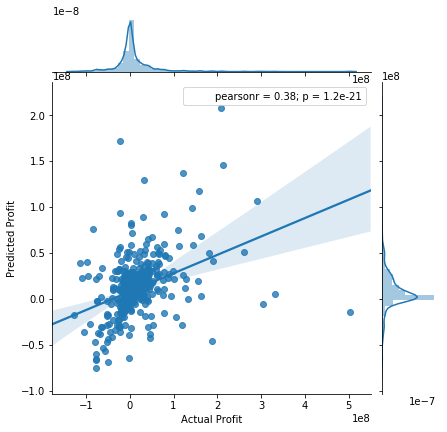

In [69]:
sns.jointplot(y_test, pred, kind='reg')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.show()

#### R^2 (coefficient of determination) regression score function.

#### Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [70]:
r2_score(y_test, pred)

0.12471120486001908

In [71]:
# NOT A GREAT R2 SCORE

In [72]:
abt_ps = pd.get_dummies ( df.drop(['name', 'gross', 'votes'], axis=1) ) #we kept the variable score for this new model

train = abt_ps[abt_ps.age >= 0]
test = abt_ps[abt_ps.age <= 0]

y_train = train.profit
X_train = train.drop(['profit'], axis=1)

y_test = test.profit
X_test = test.drop(['profit'], axis=1)

rf = RandomForestRegressor(random_state=1234)
rf.fit(X_train, y_train)

pred = rf.predict(X_test)

/Users/alejandrogarcia/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alejandrogarcia/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


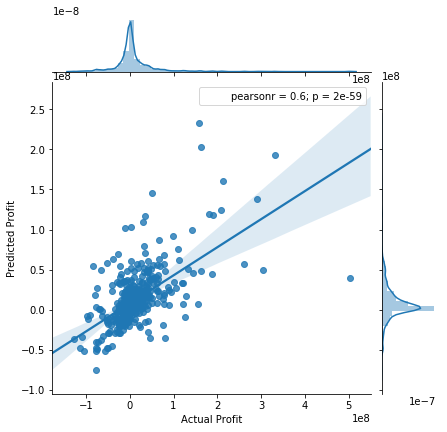

In [73]:
sns.jointplot(y_test, pred, kind='reg')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.show()

In [74]:
r2_score(y_test, pred)

0.36381519145681196

In [75]:
#Much better R2 score

In [78]:
def plot_feature_importances(columns, feature_importances, show_top_n=10):
    feats = dict( zip(columns, feature_importances) )
    imp = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
    imp.sort_values(by='Gini-importance').tail(show_top_n).plot(kind='barh', figsize=(8,8))
    plt.show()

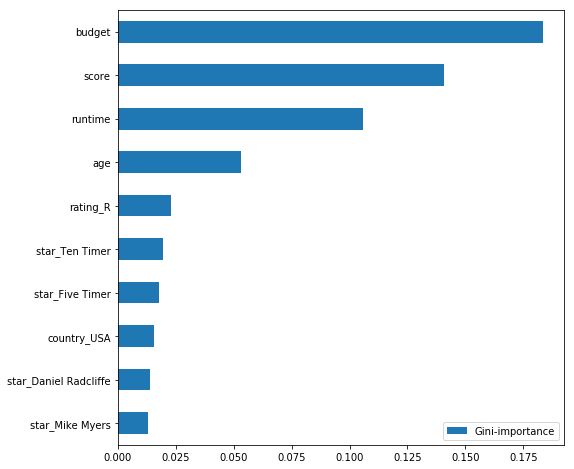

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_feature_importances(X_train.columns, rf.feature_importances_)

In [80]:
#As some Data Scientists might say, more data does not mean more results. Clearly only a few variables matter